In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Employee_Salary_Dataset.csv')
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [3]:
df.describe()

,ID,Experience_Years,Age,Salary
count,35.000000,35.00000,35.000000,3.500000e+01
mean,18.000000,9.20000,35.485714,2.059147e+06
std,10.246951,7.55295,14.643552,3.170124e+06
min,1.000000,1.00000,17.000000,3.000000e+03
25%,9.500000,2.50000,22.500000,2.250000e+04
50%,18.000000,6.00000,29.000000,2.500000e+05
75%,26.500000,15.00000,53.500000,3.270000e+06
max,35.000000,27.00000,62.000000,1.000000e+07


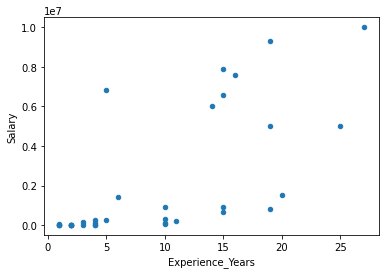

In [4]:
df.plot(kind='scatter',x='Experience_Years',y ='Salary')
plt.show()

In [5]:
df =df.drop(['ID','Age','Gender'],axis=1)

In [7]:
df.isnull().sum()

Experience_Years    0
Salary              0
dtype: int64

In [6]:
sc = StandardScaler()
data_stand = sc.fit_transform(df)
data_stand

array([[-0.56419239, -0.57901825],
       [-1.10151848, -0.64302833],
       [-0.83285543, -0.60462228],
       [-0.96718696, -0.65102959],
       [-1.10151848, -0.65583035],
       [ 2.12243804,  0.94154116],
       [ 1.31644891, -0.40299054],
       [-0.96718696, -0.6561504 ],
       [ 0.10746522, -0.63934775],
       [ 0.77912283, -0.4509981 ],
       [-0.69852391, -0.57901825],
       [-0.42986087, -0.2109603 ],
       [ 0.6447913 ,  1.2612875 ],
       [ 0.24179674, -0.58858776],
       [-0.96718696, -0.65663047],
       [-0.69852391, -0.63118647],
       [ 0.10746522, -0.36138399],
       [ 0.77912283,  1.86936725],
       [-0.96718696, -0.65423009],
       [ 0.10746522, -0.55341422],
       [ 0.77912283,  1.44370023],
       [-0.69852391, -0.65102959],
       [-0.56419239,  1.53171408],
       [-1.10151848, -0.65711055],
       [-0.69852391, -0.6561824 ],
       [-0.83285543, -0.65262984],
       [-1.10151848, -0.6580707 ],
       [ 2.39110109,  2.54147307],
       [ 1.31644891,

In [9]:
data_stand = pd.DataFrame(data_stand,columns=['Working_year','Salary'])

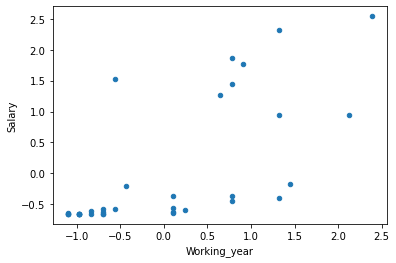

In [11]:
data_stand.plot(kind='scatter',x='Working_year',y ='Salary')
plt.show()

In [15]:
sum_of_square_distances =[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_stand)
    sum_of_square_distances.append(km.inertia_)

D:\Program Files\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


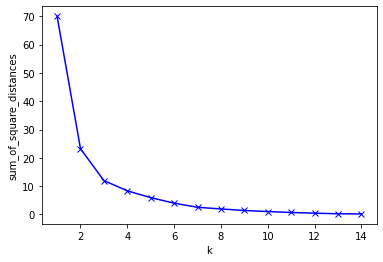

In [16]:
plt.plot(K,sum_of_square_distances,'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_square_distances')
plt.show()

In [17]:
km3 = KMeans(n_clusters=3)
km3 = km3.fit(df)

In [18]:
print(km3.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 1 0 0 2 0 2 0 0 0 0 1 2 0 0 0 0 1 1]


In [54]:
labels = km3.labels_
labels = pd.DataFrame(labels,columns=['cluter'])
df_cluteres = pd.concat([df,labels],axis=1)

df_cluteres

,Experience_Years,Salary,cluter
0,5,250000,0
1,1,50000,0
2,3,170000,0
3,2,25000,0
4,1,10000,0
5,25,5001000,2
6,19,800000,0
7,2,9000,0
8,10,61500,0
9,15,650000,0


In [55]:
df_cluteres.groupby('cluter').size()

cluter
0    26
1     4
2     5
dtype: int64

In [56]:
centroids = km3.cluster_centers_
centroids = pd.DataFrame(centroids,columns=['Centroid_Year','Centroid_Salary'])
centroids

,Centroid_Year,Centroid_Salary
0,6.423077,3.020808e+05
1,19.250000,8.700000e+06
2,15.600000,5.883210e+06


<AxesSubplot:xlabel='Centroid_Year', ylabel='Centroid_Salary'>

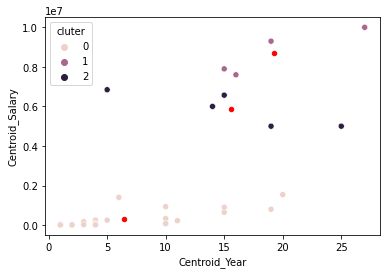

In [57]:
import seaborn as sns
s1 = sns.scatterplot(data=df_cluteres,x='Experience_Years',y='Salary',hue='cluter')
centroids.plot(ax=s1,kind='scatter',x='Centroid_Year',y='Centroid_Salary',color='red')

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df_cluteres['cluter'],km3.labels_))
print(classification_report(df_cluteres['cluter'],km3.labels_))

[[26  0  0]
 [ 0  4  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [77]:
clu_pred = km3.predict([[16,7600000],[4,900],[15,5000000]])

D:\Program Files\ana\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [78]:
clu_pred

array([1, 0, 2])